In [3]:
import numpy as np
import matplotlib.pyplot as plt

def scaling(X):
    """mean normalzation"""
    l = []
    for k in range(X.shape[1]):
        x = X[:,k]
        def f(e):
            tmp0 = sum(x) / len(x)
            tmp1 = max(x) - min(x)
            return (e - tmp0) / tmp1
        m =  list(map(float, (list(map(f, x[:, 0])))))
        l.append(m)
    return np.matrix(l).transpose()


l_cost_function = [] # lists to record data for debugging
l_iterations = [] 

def m_g_d(A, y, alfa):
    """computes gradient descent"""
    l = len(A)
    X = np.c_[np.ones(l), A]
    tmp = np.matrix([0,0,0], dtype=np.float64)
    theta = np.matrix([0,0,0], dtype=np.float64)
    cnt = 0
    m = len(X)
    ma = alfa * (1 / m)
    delta = J_m(X, y, theta)
    while delta > 0.00001:
        beg = J_m(X, y, theta)
        for j in range(X.shape[1]):
            tmp[:,j] = theta[:,j] - ma * float((((X * theta.transpose()) - y.transpose()).transpose()) * X[:,j])
        theta = tmp
        end = J_m(X, y, theta)
        l_cost_function.append(end)
        l_iterations.append(cnt)
        delta = abs(end - beg)
        cnt += 1
    return (theta, cnt)

def J_m(A, y, theta):
    """computes cost function """
    n = len(A)
    return (1 / (2 * n)) * float(sum([x * x for x in A * theta.transpose() - y.transpose()]))

CPU times: user 4.65 s, sys: 0 ns, total: 4.65 s
Wall time: 4.67 s
(matrix([[ 1.16126227,  0.58057308,  0.58055857]]), 13648)


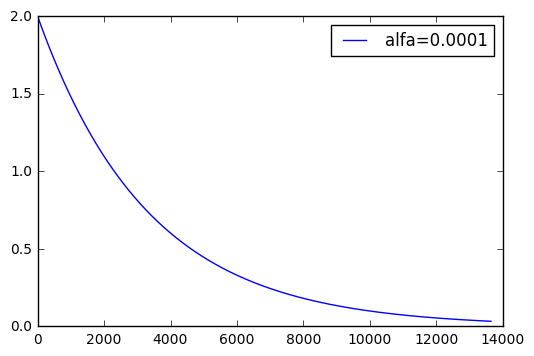

In [4]:
y = np.matrix([2, 2], dtype=np.float64)
T1 = np.matrix([[0.5, 0.5], [0.5, 0.5]], dtype=np.float64)
%time out = m_g_d(T1, y, 0.0001)
print(out)
plt.plot(l_iterations, l_cost_function, color="blue", linewidth=1, label="alfa=0.0001")
plt.legend(loc="upper right")
plt.show()